In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("/Users/yashsharma/Downloads/Data Analytics/data analysis projects/Portfolio projects/python projects/Telco Cx Churn Analysis/Telco_RAW_DATA.csv", encoding= "ISO-8859-1")

In [2]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


replacing blanks with 0 as tenure is 0 and no charges are recorded

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")
df["TotalCharges"] = df["TotalCharges"].astype("float")

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [8]:
def conv(a):
    if a==0:
        return "no"
    elif a==1:
        return "yes"

In [9]:
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

In [10]:
df["SeniorCitizen"] = df["SeniorCitizen"].str.capitalize()
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
7039,2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
7040,4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,Yes,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.60,Yes


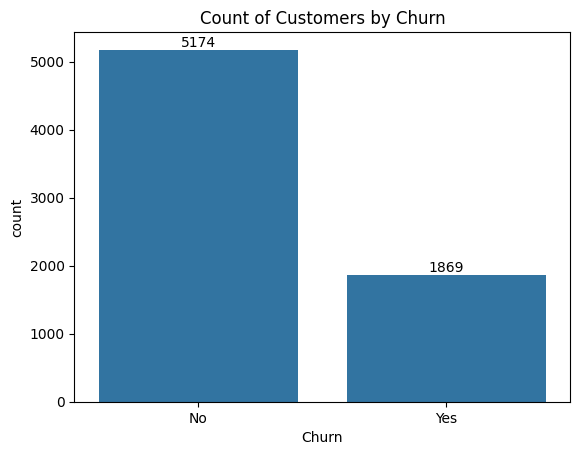

In [11]:
ax = sns.countplot(x = df["Churn"])
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

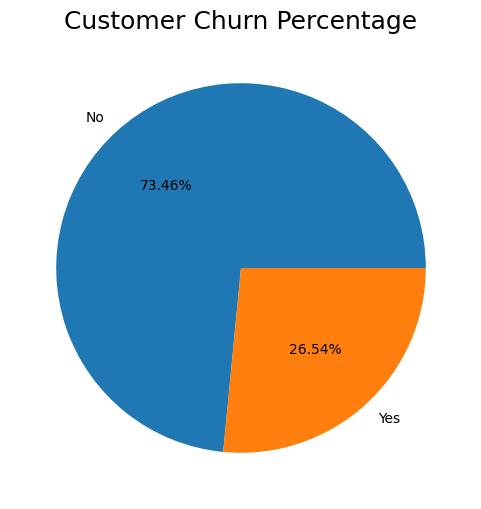

,Churn
Churn,
No,5174
Yes,1869


In [12]:
plt.figure(figsize = (6,6))
gb = df.groupby("Churn").agg({"Churn":"count"})
plt.pie(gb["Churn"], labels = gb.index, autopct = "%1.2f%%")
plt.title("Customer Churn Percentage", fontsize = 18)
plt.show()
gb

from the given pie chart we can conclude that 26.54% of our customers have churned out
now lets find out the reason behind it.

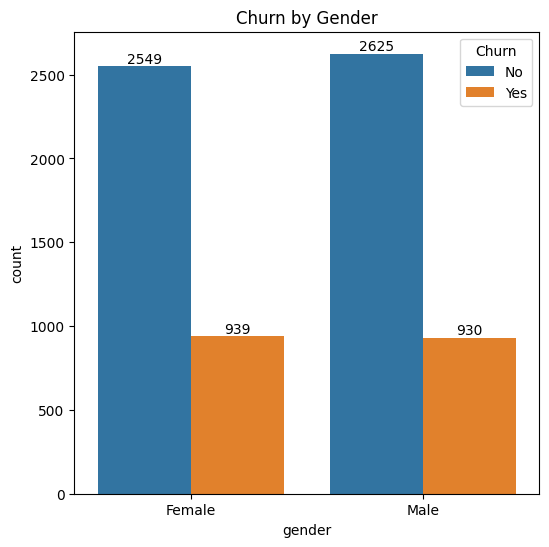

In [13]:
plt.figure(figsize = (6,6))
gx = sns.countplot(x = "gender", data= df, hue= "Churn")
gx.bar_label(gx.containers[0])
gx.bar_label(gx.containers[1])
plt.title("Churn by Gender")
plt.show()

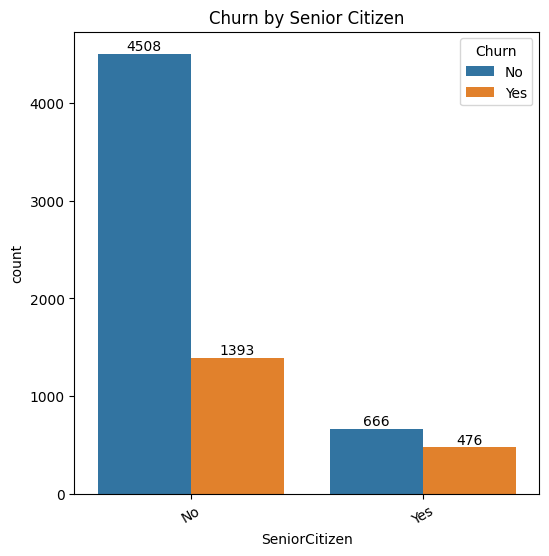

In [14]:
plt.figure(figsize = (6,6))
Sx = sns.countplot(x = "SeniorCitizen", data= df, hue= "Churn")
Sx.bar_label(Sx.containers[0])
Sx.bar_label(Sx.containers[1])
plt.title("Churn by Senior Citizen")
plt.xticks(rotation= 30)
plt.show()

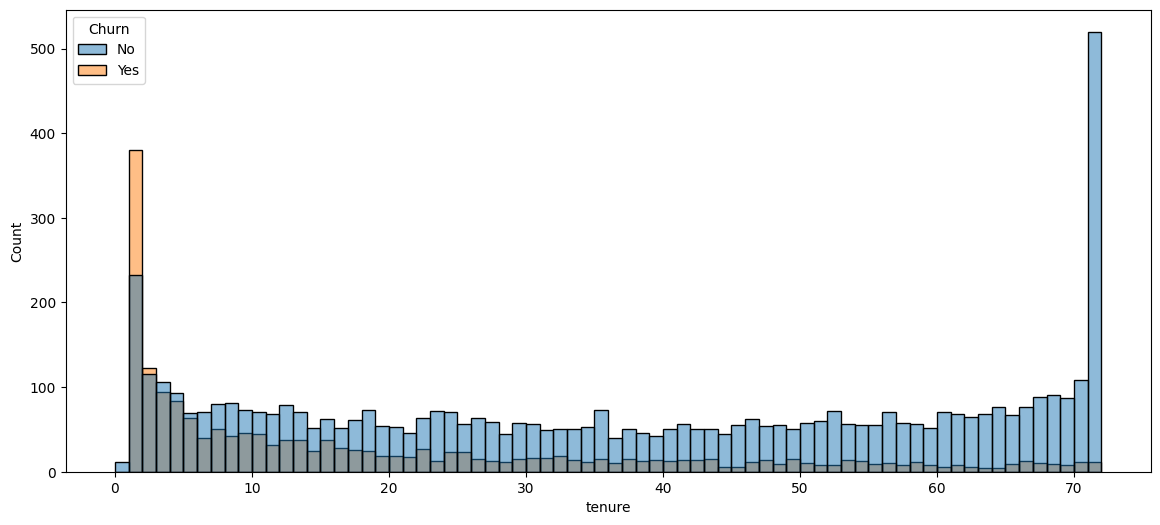

In [15]:
plt.figure(figsize=(14,6))
sns.histplot(x = "tenure", data= df, bins= 72, hue= "Churn")
plt.show()

People who have used our services for a longer period have stayed and people who have used our services for 1-2 months have churned out.

In [16]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

In [17]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

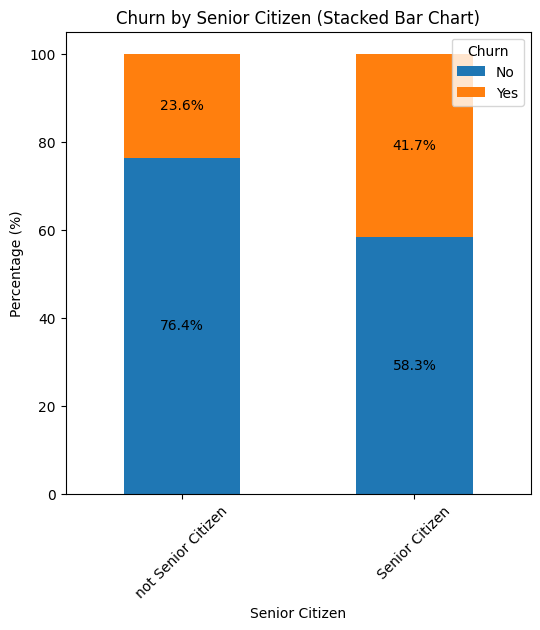

In [18]:
# calculate the percentages
total_counts = df.groupby("SeniorCitizen")["Churn"].value_counts(normalize=True).unstack() * 100
# plot
fig, ax = plt.subplots(figsize=(6,6)) # Adjust figsize for better visualization
# plot the bars
total_counts.plot(kind= "bar", stacked= True, ax=ax, color=["#1f77b4", "#ff7f0e"])
# Add percentage labels on the bars
for i in ax.patches:
    width, height = i.get_width(), i.get_height()
    x, y = i.get_xy()
    ax.text(x + width / 2, y + height / 2, f"{height:.1f}%", ha="center", va="center")

plt.title("Churn by Senior Citizen (Stacked Bar Chart)")
plt.xlabel("Senior Citizen")
plt.ylabel("Percentage (%)")
plt.xticks(ticks=[0,1],labels=["not Senior Citizen","Senior Citizen"],rotation = 45)
plt.legend(title="Churn", loc="upper right") #customize legeng location

plt.show()

Comparatively a greater percentage of people in senior citizen category have churned.

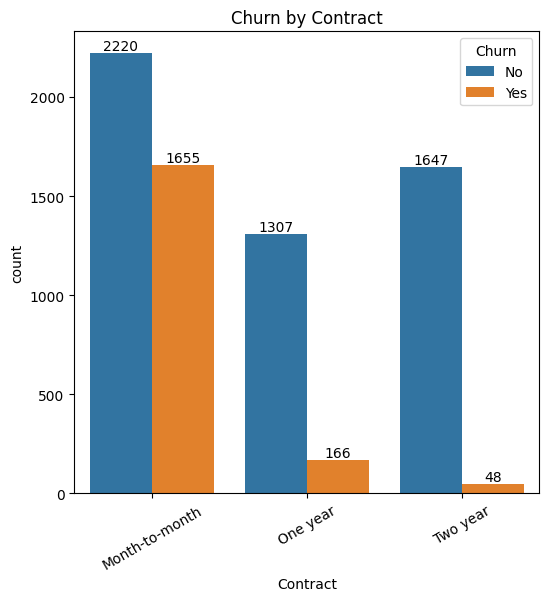

In [19]:
plt.figure(figsize = (6,6))
Cox = sns.countplot(x = "Contract", data= df, hue= "Churn")
Cox.bar_label(Cox.containers[0])
Cox.bar_label(Cox.containers[1])
plt.title("Churn by Contract")
plt.xticks(rotation= 30)
plt.show()

People who have month-to-month contract are more likely to churn than from those who have 1 year or 2 year contract.

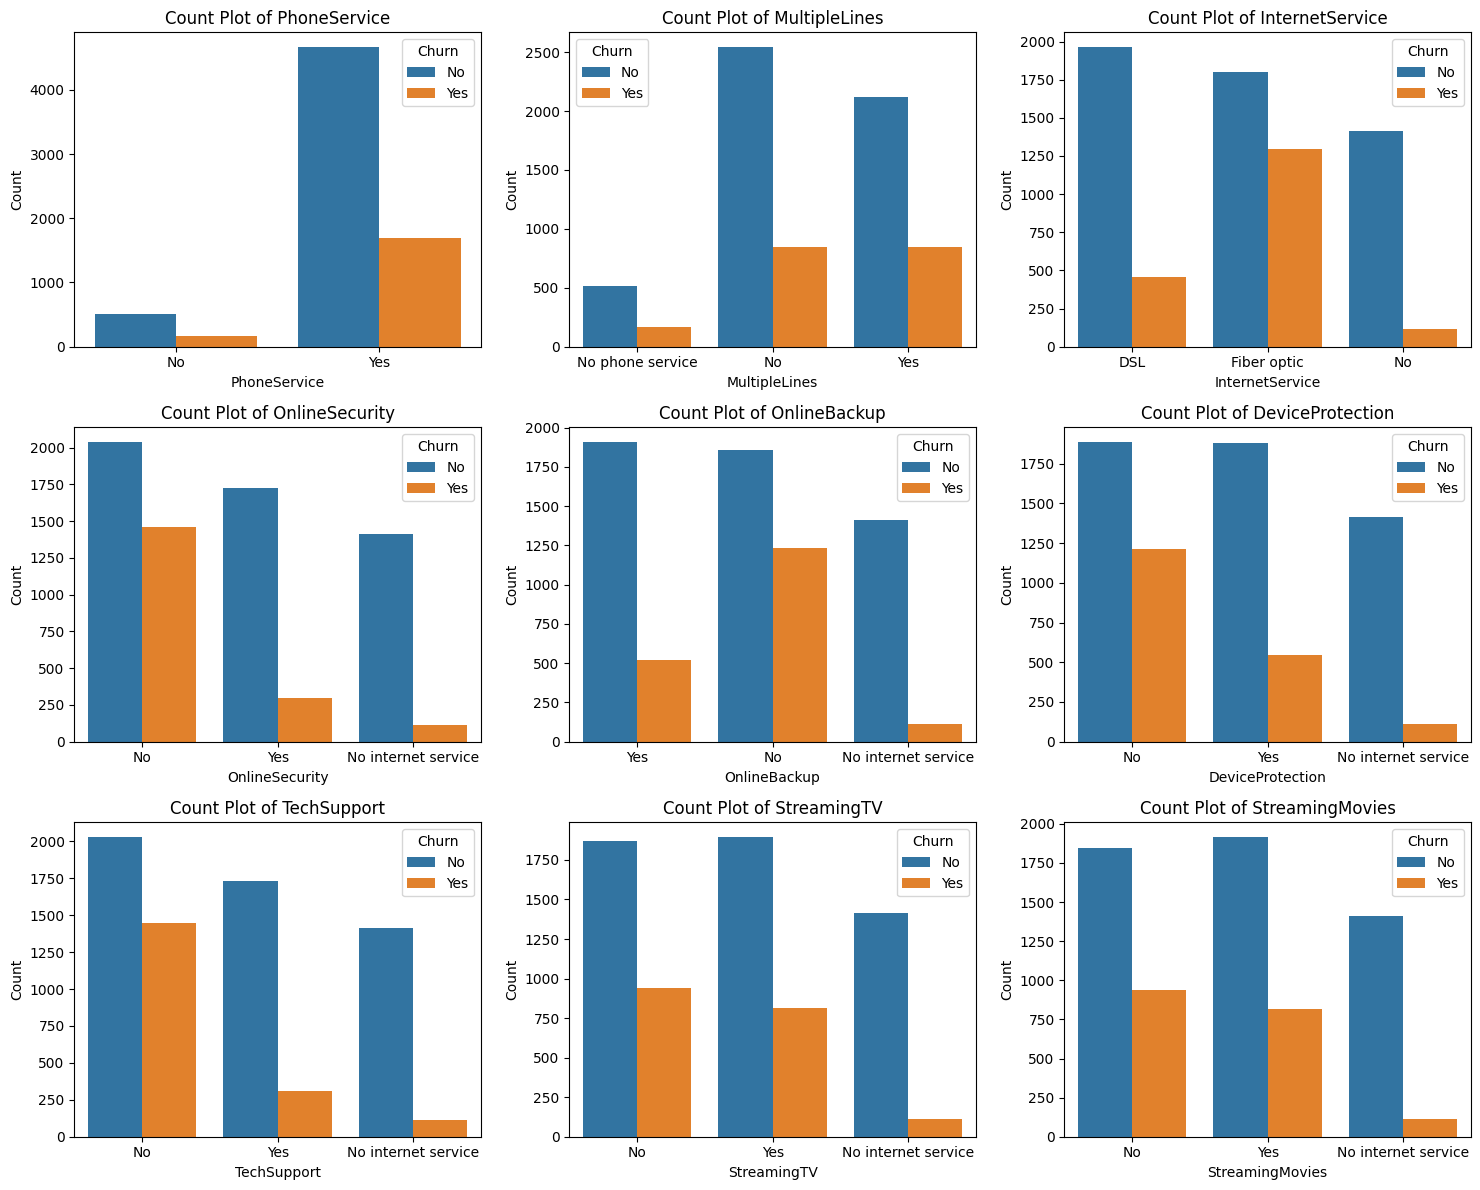

In [20]:
# List of columns for which we want to create the countplots
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Number of columns and rows for the subplot grid
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

# Create subplots
fig1, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))

# Flatten the axes1 array for easy iteration (handles both 1D and 2D arrays)
axes = axes.flatten()

# Iterate over column and plot count plots
for i, col in enumerate(columns):
    sns.countplot(x = col, data=df, ax=axes[i], hue ="Churn")
    axes[i].set_title(f"Count Plot of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Count")

# Remove empty subplots (if any)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The majority of customers who do not churn tend to have services like PhoneService, InternetService (particularly DSL), and OnlineSecurity enabled. For services like Online Backup, TechSupport, and StreamingTV, churn rates are noticeably higher when these services are not used or are unavailable.

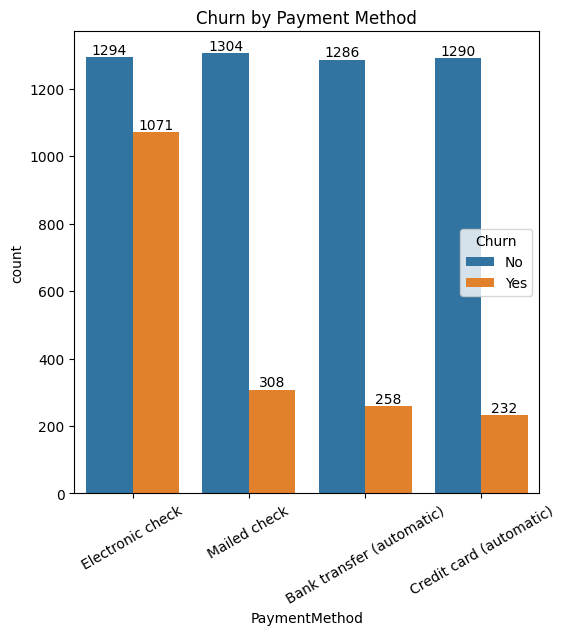

In [21]:
plt.figure(figsize = (6,6))
Pmx = sns.countplot(x = "PaymentMethod", data= df, hue= "Churn")
Pmx.bar_label(Pmx.containers[0])
Pmx.bar_label(Pmx.containers[1])
plt.title("Churn by Payment Method")
plt.xticks(rotation= 30)
plt.show()

Customers are more likely to churn when they are using Electronic Check.